#### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피쳐 : Weight, Length
- 타겟 : Species
- 유형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터 준비

In [2]:
import matplotlib.pyplot as plt
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈
import matplotlib.pyplot as plt

In [3]:
data_file = '../data/fish.csv'

In [4]:
# 5개 피쳐/특성 중 2개 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [5]:
# Bream, Smelt 품종 행만 추출
mask = fishDF['Species'].isin(['Bream', 'Smelt'])   # Boolean Indexing

# 해당 행만 도출
twofishDF = fishDF[mask]
twofishDF.index

# 인덱스 정리
twofishDF.reset_index(drop=True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [6]:
# Bream, Smelt 품종명을 수치화
# twofishDF.Species = twofishDF.Species.replace({'Bream':0, 'Smelt':1}).copy()
twofishDF.loc[:, 'Species'] = twofishDF.Species.replace({'Bream':0, 'Smelt':1}).copy()
twofishDF['Species'] = twofishDF['Species'].astype('int32').copy()

C:\Users\kdp\AppData\Local\Temp\ipykernel_25180\1337506430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofishDF['Species'] = twofishDF['Species'].astype('int32').copy()


In [7]:
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int32  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.1 KB


#(2) 데이터 전처리
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [8]:
# 표준 정규분포 => 평균 0, 표준편차 1 =>  Z-score = (피쳐 - 평균) / 표준편차
# Weight 컬럼
twofishDF.Weight.mean(), twofishDF.Weight.std()

(444.5, 328.1432328267642)

In [9]:
ret1 = twofishDF.Weight - twofishDF.Weight.mean()
ret1 = ret1/twofishDF.Weight.std()

In [10]:
twofishDF.loc[:, 'Weight'] = ret1

In [11]:
# Length 컬럼
ret2 = twofishDF.Length - twofishDF.Length.mean()
ret2 = ret2 / twofishDF.Length.std()

twofishDF.loc[:, 'Length'] = ret2

In [12]:
twofishDF

,Species,Weight,Length
0,0,-0.617109,-0.161587
1,0,-0.470831,-0.073720
2,0,-0.318458,-0.054194
3,0,-0.248367,0.189879
4,0,-0.044188,0.189879
5,0,0.016761,0.258220
6,0,0.169133,0.258220
7,0,-0.166086,0.287509
8,0,0.016761,0.287509
9,0,0.169133,0.355850


(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리

In [13]:
# 피쳐/특성/속성 데이터 추출
featureDF=twofishDF[twofishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,-0.617109,-0.161587
1,-0.470831,-0.073720


In [14]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수인코딩
targetDF = twofishDF['Species']
targetDF.head(2)

0    0
1    0
Name: Species, dtype: int32

In [15]:
targetDF = targetDF.replace({'Bream':0, 'Smelt':1})
targetDF.dtype, targetDF.head(2)

(dtype('int32'),
 0    0
 1    0
 Name: Species, dtype: int32)

(3-1) 학습/테스트 데이터셋 분리
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80:20

In [16]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.2, 
                                                    stratify=targetDF)

In [18]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---->\n{X_train.shape}, {y_train.shape}')
print(f'\n{y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ---->\n{X_test.shape}, {y_test.shape}')
print(f'\n{y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---->
(39, 2), (39,)

Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---->
(10, 2), (10,)

Species
0    0.7
1    0.3
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [19]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [20]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메소드
# (3) 데이터에 대한 스케일링 진행 : transfrom() 메소드

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
scaler.mean_

array([0.04475844, 0.04568816])

In [24]:
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [25]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

(3-3) 시각화

In [26]:
# 모듈 로딩
import matplotlib.pyplot as plt

<Axes: xlabel='Weight', ylabel='Length'>

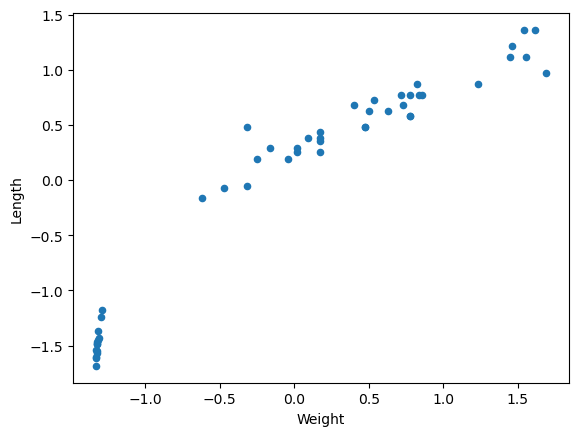

In [27]:
# => 원본 데이터 시각화
twofishDF.plot(kind='scatter', x='Weight', y='Length')

In [28]:
print(scaled_X_train)

[[ 0.04747296  0.34075435]
 [-1.35754796 -1.65853889]
 [-1.34914185 -1.52133249]
 [ 0.72296378  0.5367635 ]
 [ 0.12252749  0.38975664]
 [-1.338334   -1.48213066]
 [-0.02758158  0.24274978]
 [ 0.76499432  0.83077721]
 [ 0.72296378  0.73277264]
 [-0.20771247  0.24274978]
 [ 0.12252749  0.34075435]
 [ 1.54856368  1.32080006]
 [-0.02758158  0.21334841]
 [-0.65203532 -0.20807124]
 [-1.34884163 -1.5409334 ]
 [ 1.39845461  1.1737932 ]
 [ 0.79801832  0.73277264]
 [ 1.47350914  1.32080006]
 [-1.31942026 -1.29592198]
 [ 1.62361822  0.92878178]
 [ 0.48278927  0.68377035]
 [ 1.173291    0.83077721]
 [ 1.48852005  1.07578863]
 [-1.34193662 -1.50173158]
 [-0.28877137  0.14474521]
 [-0.35782154  0.43875892]
 [ 1.3834437   1.07578863]
 [ 0.66292015  0.73277264]
 [ 0.57285471  0.58576578]
 [-1.34193662 -1.42332792]
 [-1.35244425 -1.58993569]
 [ 0.42274564  0.43875892]
 [ 0.42274564  0.43875892]
 [ 0.3476911   0.63476807]
 [-1.34914185 -1.59973615]
 [-1.31881982 -1.22731878]
 [ 0.12252749  0.21334841]
 

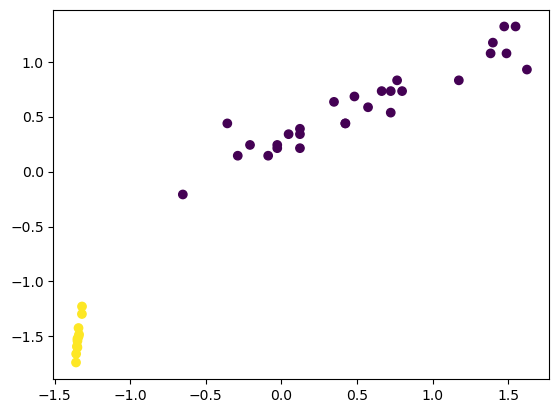

In [29]:
# => 스케일된 데이터 시각화
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c=y_train)

(4) 학습 진행

In [30]:
# 방법 (1) : KNN 알고리즘
# 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
# n_neighbors 즉 k 갯수 : 1 ~ 전체 데이터 수
max_k = scaled_X_train.shape[0]

test_scoreList = []
train_scoreList = []
for k in range(1, max_k+1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    train_scoreList.append(model.score(scaled_X_train, y_train))
    test_scoreList.append(model.score(scaled_X_test, y_test))

In [31]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f'Train Score : {train_scoreList}')
print(f'Test  Score : {test_scoreList}')

Train Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Test  Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


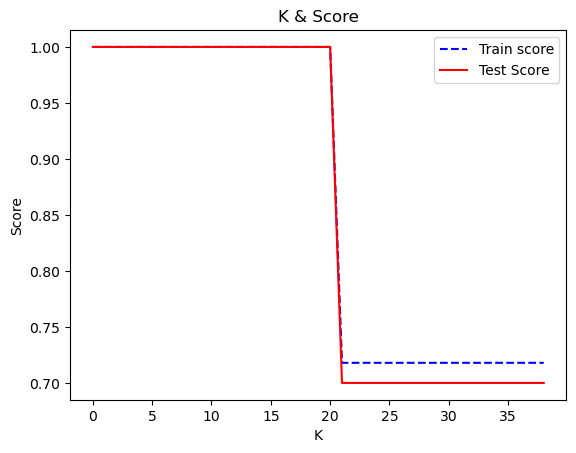

In [34]:
# K 갯수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label='Train score')
plt.plot(test_scoreList, 'r-', label='Test Score')
plt.title('K & Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
# 방법 2 : SVC
from sklearn.svm import SVC

fishmodel2 = SVC()
fishmodel2.fit(scaled_X_train, y_train)

In [ ]:
# 방법 3 : 
from sklearn.linear_model import LogisticRegression

fishmodel3 = LogisticRegression()
fishmodel3.fit(scaled_X_train, y_train)